<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad6_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
import imutils

In [ ]:
def aplicar_ruido(image,ruido):
    imagen_ruido = np.clip(image + ruido, 0, 255).astype(np.uint8)
    return imagen_ruido

In [ ]:
def calcular_ecm(img1, img2):
  diff = img1.astype(np.float32) - img2.astype(np.float32)
  diff = diff ** 2
  return np.mean(diff)

In [ ]:
#Ejercicio 1
# Función para generar ruido gaussiano con media en 0
def generate_gaussian_noise(mean, sigma, size):
    noise = np.random.normal(mean, sigma, size)
    return noise

# Función para generar ruido uniforme con media en 0
def generate_uniform_noise(min_val, max_val, size):
    noise = np.random.uniform(min_val, max_val, size)
    noise -= np.mean(noise)  # Ajuste para tener media en 0
    return noise

# Función para generar ruido exponencial con media en 0
def generate_exponential_noise(scale, size):
    noise = np.random.exponential(scale, size)
    noise -= np.mean(noise)  # Ajuste para tener media en 0
    return noise

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    height, width = noisy_image.shape

    # Generamos máscaras de ruido de sal y pimienta
    salt_mask = np.random.rand(height, width) < salt_prob
    pepper_mask = np.random.rand(height, width) < pepper_prob

    # Agregamos ruido de sal
    noisy_image[salt_mask] = 255

    # Agregamos ruido de pimienta
    noisy_image[pepper_mask] = 0

    return noisy_image

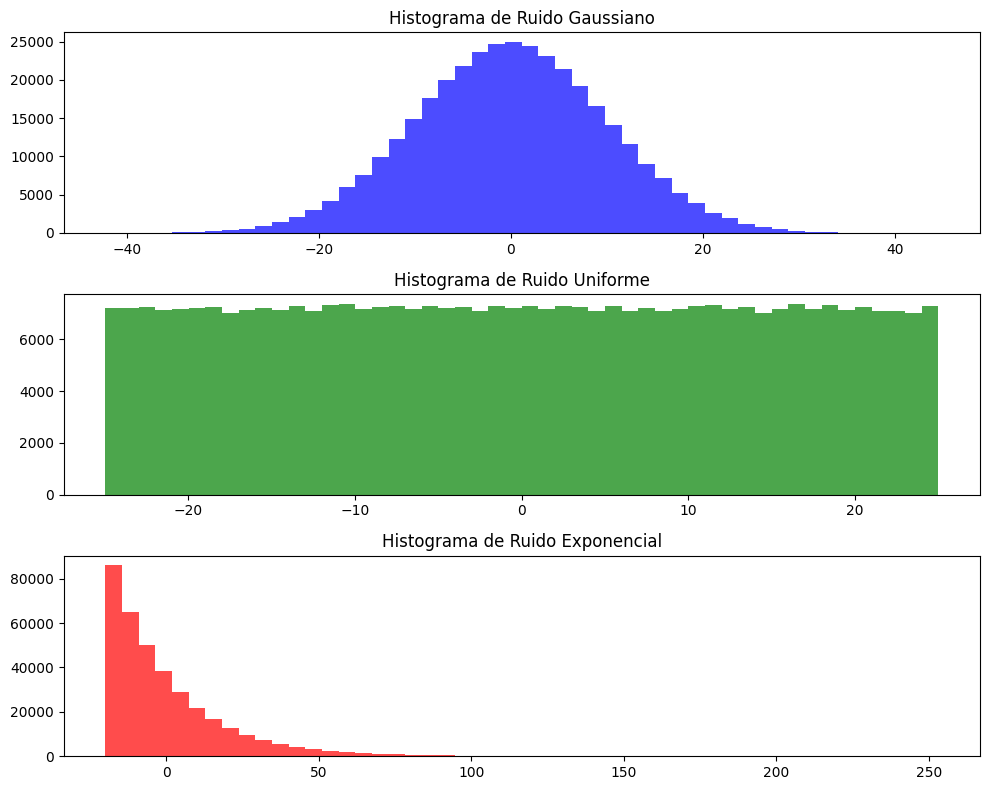

In [ ]:
# Dimensiones de la imagen
height = 600
width = 600
# Generar ruido gaussiano con media en 0 y desviación estándar 0.1
gaussian_noise = generate_gaussian_noise(0, 10, (height, width))
# Generar ruido uniforme con media en 0 y valores entre -0.5 y 0.5
uniform_noise = generate_uniform_noise(-25, 25, (height, width))
# Generar ruido exponencial con media en 0 y escala 0.1
exponential_noise = generate_exponential_noise(20, (height, width))
# Visualizar los histogramas de los diferentes tipos de ruido
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.hist(gaussian_noise.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de Ruido Gaussiano')
plt.subplot(3, 1, 2)
plt.hist(uniform_noise.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Histograma de Ruido Uniforme')
plt.subplot(3, 1, 3)
plt.hist(exponential_noise.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Histograma de Ruido Exponencial')
plt.tight_layout()
plt.show()

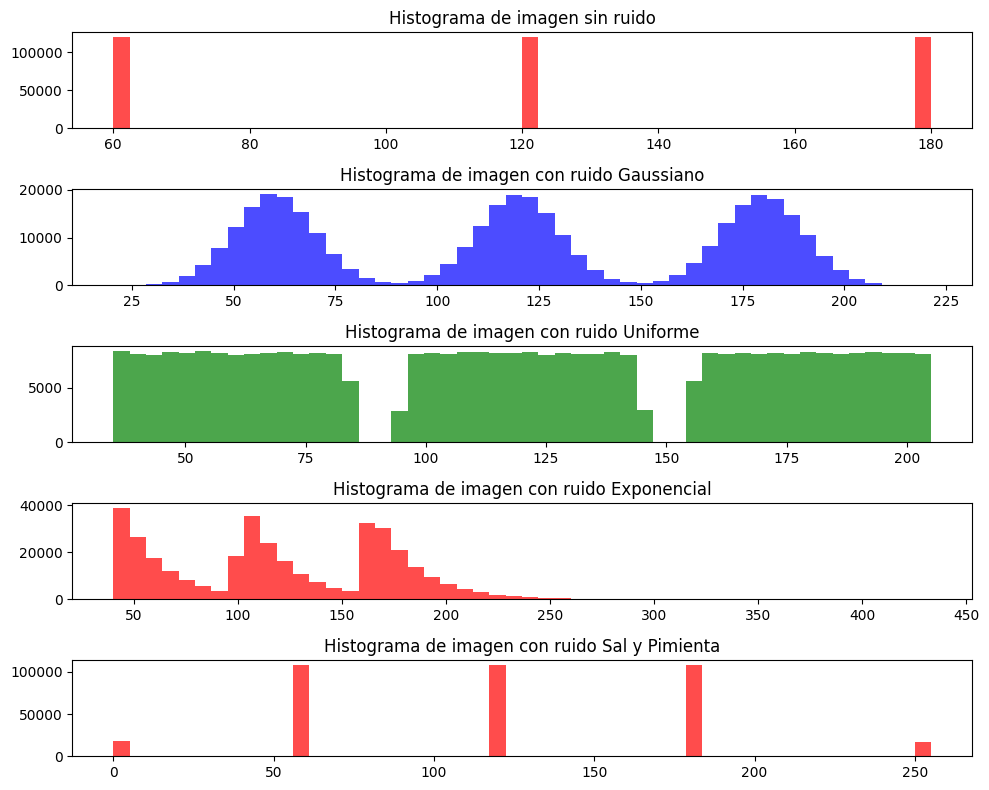

In [ ]:
# Crear la imagen de 600x600 píxeles
image = np.ones((600, 600), dtype=np.uint8) * 180  # Fondo gris claro (≈ 180)

# Agregar franjas verticales de grises constantes
image[:, :200] = 60  # Franja oscura (≈ 60)
image[:, 200:400] = 120  # Franja media (≈ 120)
image[:, 400:] = 180  # Franja clara (≈ 180)
gaussian_noise += image
uniform_noise += image
exponential_noise += image
salt_peper_noise = add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05)
plt.figure(figsize=(10, 8))

plt.subplot(5, 1, 1)
plt.hist(image.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Histograma de imagen sin ruido')
plt.subplot(5, 1, 2)
plt.hist(gaussian_noise.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma de imagen con ruido Gaussiano')
plt.subplot(5, 1, 3)
plt.hist(uniform_noise.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Histograma de imagen con ruido Uniforme')
plt.subplot(5, 1, 4)
plt.hist(exponential_noise.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Histograma de imagen con ruido Exponencial')
plt.subplot(5, 1, 5)
plt.hist(salt_peper_noise.flatten(), bins=50, color='red', alpha=0.7)
plt.title('Histograma de imagen con ruido Sal y Pimienta')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'img with salt and pepper noise')

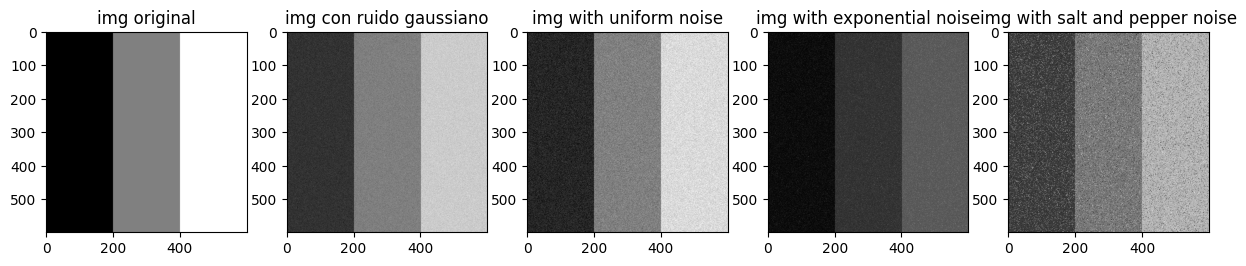

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(15,30))
ax[0].imshow(image,cmap='gray'); ax[0].set_title('img original')
ax[1].imshow(gaussian_noise,cmap='gray'); ax[1].set_title('img con ruido gaussiano')
ax[2].imshow(uniform_noise,cmap='gray'); ax[2].set_title('img with uniform noise')
ax[3].imshow(exponential_noise,cmap='gray'); ax[3].set_title('img with exponential noise')
ax[4].imshow(salt_peper_noise,cmap='gray'); ax[4].set_title('img with salt and pepper noise')

In [ ]:
# ================= EJERCICIO 2 ============================

In [ ]:
def geometric_mean_filter(image, kernel_size):
    height, width = image.shape
    image = np.float32(image)
    pad = kernel_size // 2
    result = np.zeros((height, width), dtype=np.float32)

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            neighbors = image[i-pad:i+pad+1, j-pad:j+pad+1]
            result[i, j] = np.uint8(np.prod(neighbors) ** (1.0 / (kernel_size**2)))
    return result
def contra_harmonic_mean_filter(image, kernel_size, Q):
    height, width = image.shape
    image = np.float32(image)
    pad = kernel_size // 2
    result = np.zeros((height, width), dtype=np.float32)

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            neighbors = image[i-pad:i+pad+1, j-pad:j+pad+1]
            numerator = np.sum(neighbors ** (Q+1))
            denominator = np.sum(neighbors ** Q)
            result[i, j] = numerator / denominator if denominator != 0 else 0
    return np.uint8(result)

Text(0.5, 1.0, 'img con filtro geometrico')

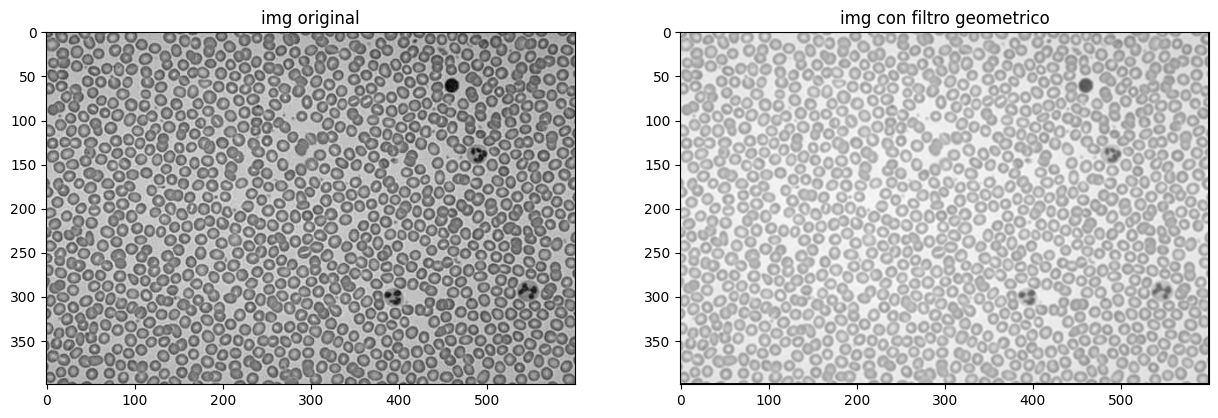

In [ ]:
# Ejercicio 2.2
image = cv2.imread('sangre.jpg', cv2.IMREAD_GRAYSCALE)
geometric_mean = geometric_mean_filter(image, kernel_size=3)
contra_harmonic_mean = contra_harmonic_mean_filter(image, kernel_size=3, Q=-1)
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,30))
ax[0].imshow(image,cmap='gray',vmin=0,vmax=255); ax[0].set_title('img original')
ax[1].imshow(geometric_mean,cmap='gray',vmin=0,vmax=255); ax[1].set_title('img con filtro geometrico')
ax[2].imshow(geometric_mean,cmap='gray',vmin=0,vmax=255); ax[2].set_title('img con filtro contra armonico')

In [ ]:
#Ejercicio 2.2
#We contaminate the image
gaussian_noise = generate_gaussian_noise(0, 20,image.shape)
image_gaussian_noise =  np.clip(gaussian_noise +image,0,255)
image2 = image.copy()
image_salt_peper_noise = add_salt_and_pepper_noise(image, salt_prob=0.1, pepper_prob=0.1)
#We apply the geometric mean filter to both contaminated images
kernel_size = 3
geometric_gaussian = geometric_mean_filter(image_gaussian_noise, kernel_size)
geometric_salt_pepper = geometric_mean_filter(image_salt_peper_noise, kernel_size)
#We apply the contra armonic mean filter to both contaminated images
# Q = -1 -> harmonic mean // Q= 0 -> aritmetic mean //
# Q > 1 -> good for pepper noise but no salt noise // Q < 0 -> good for salt noise but not pepper noise
Q = 1
contra_harmonic_gaussian = contra_harmonic_mean_filter(image_gaussian_noise, kernel_size, Q)
contra_harmonic_salt_pepper = contra_harmonic_mean_filter(image_salt_peper_noise, kernel_size, Q)
#Calcule error cuadratic mean
print('ECM original and degraded gauisiana --->',np.mean((image - image_gaussian_noise) ** 2))
print('ECM original and degraded salt and pepper --->',np.mean((image2 - image_salt_peper_noise) ** 2))
print('ECM original and filtered gaussian with geometric --->',np.mean((image - geometric_gaussian) ** 2))
print('ECM original and filtered salt and pepper with geometric --->',np.mean((image - geometric_salt_pepper) ** 2))
print('ECM original and filtered gausian with anti-harmonic --->',np.mean((image - contra_harmonic_gaussian) ** 2))
print('ECM original and filtered salt and pepper with anti-harmonic --->',np.mean((image - contra_harmonic_salt_pepper) ** 2))
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(15,30))
ax[0,0].imshow(image_gaussian_noise,cmap='gray',vmin=0,vmax=255); ax[0,0].set_title('gaussian noise')
ax[0,1].imshow(image_salt_peper_noise,cmap='gray',vmin=0,vmax=255); ax[0,1].set_title('salt and pepper noise')
ax[1,0].imshow(geometric_gaussian,cmap='gray',vmin=0,vmax=255); ax[1,0].set_title('gaussian with geometric')
ax[1,1].imshow(geometric_salt_pepper,cmap='gray',vmin=0,vmax=255); ax[1,1].set_title('salt and pepper with geometric')
ax[2,0].imshow(contra_harmonic_gaussian,cmap='gray',vmin=0,vmax=255); ax[2,0].set_title('gausian with anti-harmonic')
ax[2,1].imshow(contra_harmonic_salt_pepper,cmap='gray',vmin=0,vmax=255); ax[2,1].set_title('salt and pepper with anti-harmonic')

In [ ]:
# ================= Ejercicio 3 ====================

In [ ]:
filtered_image = cv2.medianBlur(image, kernel_size)
def filtro_mediana(image,kernel_size):
  height, width = image.shape[:2]
  imagen_filtrada = np.zeros_like(image)
  margen = kernel_size // 2
  for i in range(margen, height - margen):
    for j in range(margen, width - margen):
      # Extraer la vecindad del píxel actual
      vecindad = image[i-margen : i+margen+1, j-margen : j+margen+1]
      valor_medio = np.median(vecindad) # calculo el promedio
      imagen_filtrada[i,j] = valor_medio
  return imagen_filtrada

def filtro_punto_medio(image,kernel_size):
  height, width = image.shape[:2]
  image = np.float32(image)
  imagen_filtrada = np.zeros_like(image)
  # Márgenes del kernel
  margen = kernel_size // 2
  for i in range(margen, height - margen):
    for j in range(margen, width - margen):
      # Extraer la vecindad del píxel actual
      vecindad = image[i-margen : i+margen+1, j-margen : j+margen+1]
      punto_medio = (np.min(vecindad) + np.max(vecindad)) // 2 #calculo el punto medio entre el valor mínimo y máximo en la vecindad
      imagen_filtrada[i,j] = punto_medio
  return imagen_filtrada

def filtro_media_alfa_recortado(image,kernel_size,d):
  height, width = image.shape[:2]
  imagen_filtrada = np.zeros_like(image)
  # Márgenes del kernel
  margen = kernel_size // 2
  for i in range(margen, height - margen):
    for j in range(margen, width - margen):
      # Extraer la vecindad del píxel actual
      vecindad = image[i-margen : i+margen+1, j-margen : j+margen+1]
      vecindad_ordenada = np.sort(vecindad, axis=None)
      vecindad_recortada = vecindad_ordenada[d:-d]  # Recortar los valores d/2 más bajos y d/2 más altos
      punto_medio = np.mean(vecindad_recortada) # Calcular la media de la vecindad recortada
      imagen_filtrada[i,j] = punto_medio
  return imagen_filtrada


In [ ]:
# Ejercicio 3.1
# Implemente los siguientes filtros y aplıquelos a la misma imagen degradada del ejercicio anterior.

imagen_sangre = cv2.imread('sangre.jpg', cv2.IMREAD_GRAYSCALE)

ruido_gaussiano = generate_gaussian_noise(0, 0.5, imagen_sangre.shape)
imagen_gausian_noise = aplicar_ruido(imagen_sangre,ruido_gaussiano)

imagen_salt_pepper_noise = add_salt_and_pepper_noise(imagen_sangre, salt_prob=0.05, pepper_prob=0.05)

In [ ]:
kernel_size = 3
d = 3 # valor de alfa recortado
# aplico los filtros
# (a) Filtro de mediana,
imagen_a_gaussian = filtro_mediana(imagen_gausian_noise,kernel_size)
imagen_a_salt_pepper = filtro_mediana(imagen_salt_pepper_noise,kernel_size)
# (b) Filtro del punto medio,
imagen_b_gaussian = filtro_punto_medio(imagen_gausian_noise,kernel_size)
imagen_b_salt_pepper = filtro_punto_medio(imagen_salt_pepper_noise,kernel_size)
# (c) Filtro de media-alfa recortado
imagen_c_gaussian = filtro_media_alfa_recortado(imagen_gausian_noise,kernel_size,d)
imagen_c_salt_pepper = filtro_media_alfa_recortado(imagen_salt_pepper_noise,kernel_size,d)
# (d) Aplique sucesivamente el filtro (a) y luego el filtro (b).
imagen_d_gaussian = filtro_mediana(imagen_gausian_noise,kernel_size)
imagen_d_gaussian = filtro_punto_medio(imagen_d_gaussian,kernel_size)
imagen_d_salt_pepper = filtro_mediana(imagen_salt_pepper_noise,kernel_size)
imagen_d_salt_pepper = filtro_punto_medio(imagen_d_salt_pepper,kernel_size)

<ipython-input-15-f140a4162cf4>:23: RuntimeWarning: overflow encountered in scalar add
  punto_medio = (np.min(vecindad) + np.max(vecindad)) // 2 #calculo el punto medio entre el valor mínimo y máximo en la vecindad


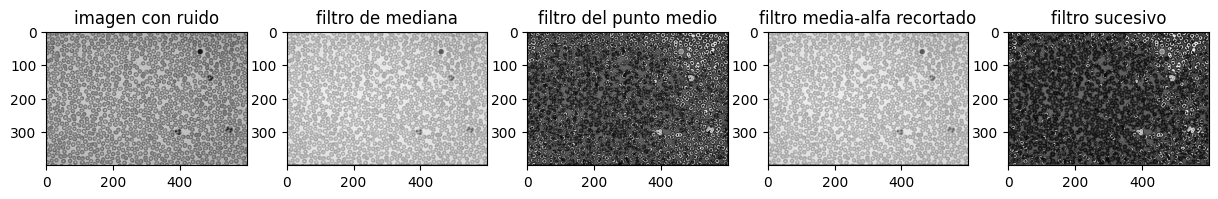

In [ ]:
# ploteo los resultados
fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(15,5))
ax[0,0].imshow(imagen_gausian_noise,cmap='gray');ax[0,0].set_title('imagen con ruido')
ax[0,1].imshow(imagen_a_gaussian,cmap='gray');ax[0,1].set_title('filtro de mediana')
ax[0,2].imshow(imagen_b_gaussian,cmap='gray');ax[0,2].set_title('filtro del punto medio')
ax[0,3].imshow(imagen_c_gaussian,cmap='gray');ax[0,3].set_title('filtro media-alfa recortado')
ax[0,4].imshow(imagen_d_gaussian,cmap='gray');ax[0,4].set_title('filtro sucesivo')
ax[1,0].imshow(imagen_salt_pepper_noise,cmap='gray');ax[1,0].set_title('imagen con ruido')
ax[1,1].imshow(imagen_a_salt_pepper,cmap='gray');ax[1,1].set_title('filtro de mediana')
ax[1,2].imshow(imagen_b_salt_pepper,cmap='gray');ax[1,2].set_title('filtro del punto medio')
ax[1,3].imshow(imagen_c_salt_pepper,cmap='gray');ax[1,3].set_title('filtro media-alfa recortado')
ax[1,4].imshow(imagen_d_salt_pepper,cmap='gray');ax[1,4].set_title('filtro sucesivo')
plt.show()


In [ ]:
# Ejercicio 3.2
# Indique en cual de los casos se logra una mejor remocion del ruido.
# ¿Que particularidades observa en cada uno de los resultados?
#median filter : Preserves more edges and fine details than lineal filters, is very good for salt and pepper noise,
    #does not introduce artifacts and is generally effective for non-Gaussian distributions
#middle point filter: it's not good for sal and pepper noise because it creates a lot of middle grays in the image,
    #it's not good for gaussian noise,it only serves to soften the image.
#alfa-trimmed-mean fitler: Robustness to outliers, it preverves more details and edges, it is very good for salt and peper noise
 # as well as for gaussian noise, but more computacional complexity and depends on the trimmed parameter
#The best filters are median and alfa-trimmed-mean


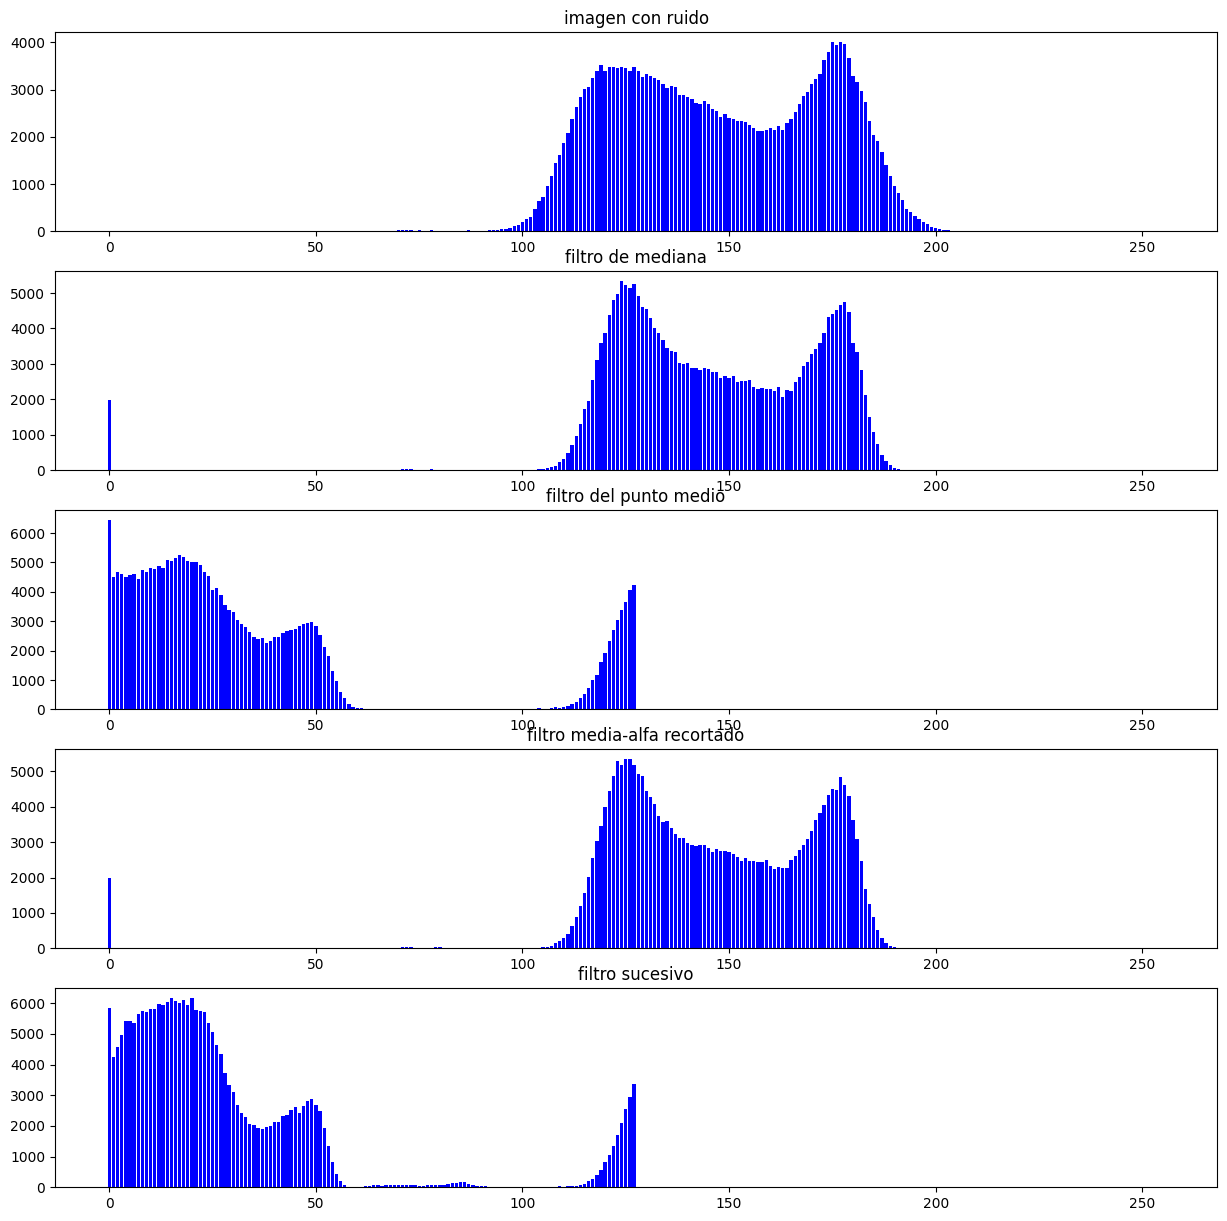

In [ ]:
# Visualice los histogramas antes y despues de cada uno de los filtrados.
hist_1 = cv2.calcHist([imagen_gausian_noise],[0],None,[256],[0,256]).astype(int)
hist_1 = [elemento for sublist in hist_1 for elemento in sublist]
hist_2 = cv2.calcHist([imagen_a_gaussian],[0],None,[256],[0,256]).astype(int)
hist_2 = [elemento for sublist in hist_2 for elemento in sublist]
hist_3 = cv2.calcHist([imagen_b_gaussian],[0],None,[256],[0,256]).astype(int)
hist_3 = [elemento for sublist in hist_3 for elemento in sublist]
hist_4 = cv2.calcHist([imagen_c_gaussian],[0],None,[256],[0,256]).astype(int)
hist_4 = [elemento for sublist in hist_4 for elemento in sublist]
hist_5 = cv2.calcHist([imagen_d_gaussian],[0],None,[256],[0,256]).astype(int)
hist_5 = [elemento for sublist in hist_5 for elemento in sublist]
hist_6 = cv2.calcHist([imagen_salt_pepper_noise],[0],None,[256],[0,256]).astype(int)
hist_6 = [elemento for sublist in hist_6 for elemento in sublist]
hist_7 = cv2.calcHist([imagen_a_salt_pepper],[0],None,[256],[0,256]).astype(int)
hist_7 = [elemento for sublist in hist_7 for elemento in sublist]
hist_8 = cv2.calcHist([imagen_b_salt_pepper],[0],None,[256],[0,256]).astype(int)
hist_8 = [elemento for sublist in hist_8 for elemento in sublist]
hist_9 = cv2.calcHist([imagen_c_salt_pepper],[0],None,[256],[0,256]).astype(int)
hist_9 = [elemento for sublist in hist_9 for elemento in sublist]
hist_10 = cv2.calcHist([imagen_d_salt_pepper],[0],None,[256],[0,256]).astype(int)
hist_10 = [elemento for sublist in hist_10 for elemento in sublist]

hist_original = cv2.calcHist([imagen_sangre],[0],None,[256],[0,256]).astype(int)
hist_original = [elemento for sublist in hist_original for elemento in sublist]
fig, ax = plt.subplots(nrows=6,ncols=2,figsize=(15,15))
ax[0,0].bar(x=np.arange(0,256),height=hist_1,color='blue');ax[0,0].set_title('imagen con ruido gausiano')
ax[1,0].bar(x=np.arange(0,256),height=hist_2,color='blue');ax[1,0].set_title('filtro de mediana')
ax[2,0].bar(x=np.arange(0,256),height=hist_3,color='blue');ax[2,0].set_title('filtro del punto medio')
ax[3,0].bar(x=np.arange(0,256),height=hist_4,color='blue');ax[3,0].set_title('filtro media-alfa recortado')
ax[4,0].bar(x=np.arange(0,256),height=hist_5,color='blue');ax[4,0].set_title('filtro sucesivo')
ax[5,0].bar(x=np.arange(0,256),height=hist_original,color='blue');ax[5,0].set_title('histograma original')
ax[0,1].bar(x=np.arange(0,256),height=hist_6,color='blue');ax[0,1].set_title('imagen con ruido sal y pimienta')
ax[1,1].bar(x=np.arange(0,256),height=hist_7,color='blue');ax[1,1].set_title('filtro de mediana')
ax[2,1].bar(x=np.arange(0,256),height=hist_8,color='blue');ax[2,1].set_title('filtro del punto medio')
ax[3,1].bar(x=np.arange(0,256),height=hist_9,color='blue');ax[3,1].set_title('filtro media-alfa recortado')
ax[4,1].bar(x=np.arange(0,256),height=hist_10,color='blue');ax[4,1].set_title('filtro sucesivo')
#ax[5,1].bar(x=np.arange(0,256),height=hist_original,color='blue');ax[5,0].set_title('histograma original')
plt.show()

In [ ]:
# Compare los resultados subjetivamente y mediante el ECM.
ecm0 = calcular_ecm(imagen_sangre,imagen_gausian_noise)
ecm1 = calcular_ecm(imagen_sangre,imagen_a_gaussian)
ecm2 = calcular_ecm(imagen_sangre,imagen_b_gaussian)
ecm3 = calcular_ecm(imagen_sangre,imagen_c_gaussian)
ecm4 = calcular_ecm(imagen_sangre,imagen_d_salt_pepper)
print('Resultados para Ruido Gaussiano')
print('ECM imagen original e imagen con ruido: ',ecm0)
print('ECM imagen original y filtro mediana: ',ecm1)
print('ECM imagen original y filtro punto medio: ',ecm2)
print('ECM imagen original y filtro media alfa recortado: ',ecm3)
print('ECM imagen original y filtro mediana-punto medio: ',ecm4)
ecm0 = calcular_ecm(imagen_sangre,imagen_salt_pepper_noise)
ecm1 = calcular_ecm(imagen_sangre,imagen_a_salt_pepper)
ecm2 = calcular_ecm(imagen_sangre,imagen_b_salt_pepper)
ecm3 = calcular_ecm(imagen_sangre,imagen_c_salt_pepper)
ecm4 = calcular_ecm(imagen_sangre,imagen_d_salt_pepper)
print('Resultados para Ruido Sal y Pimienta')
print('ECM imagen original e imagen con ruido: ',ecm0)
print('ECM imagen original y filtro mediana: ',ecm1)
print('ECM imagen original y filtro punto medio: ',ecm2)
print('ECM imagen original y filtro media alfa recortado: ',ecm3)
print('ECM imagen original y filtro mediana-punto medio: ',ecm4)

error cuadratico medio entre imagen original y filtro mediana:  218.36005
error cuadratico medio entre imagen original y filtro punto medio:  14618.201
error cuadratico medio entre imagen original y filtro media alfa recortado:  220.06357
error cuadratico medio entre imagen original y filtro mediana-punto medio:  15443.646


In [ ]:
# 3. Compare, discuta y saque conclusiones respecto de los resultados del filtrado de medias del Ejercicio 2.
#geometric filter softens the image, but considerations must be taken:
 #The data type must be large enough to accommodate the result of multipliacion, then division
 #if there are pixels with zero value, the result of multiplication will be zero, because is bad to pepper noise
#contra harmonic mean filter: it depends on the Q value to reduce salt noise or pepper noise

In [ ]:
# =================== Ejercicio 4 =================

In [ ]:
# 4.1 Cargue una imagen y realice un degradado mediante la adicion de ruido gaussiano de valor medio 0 y varianza 0.01.
imagen_4 = cv2.imread('roman.webp',cv2.IMREAD_GRAYSCALE)
media_ruido = 0
varianza_ruido = 0.01
ruido_gaussiano = generate_gaussian_noise(media_ruido, varianza_ruido, imagen_4.shape)
imagen_4_gauss = aplicar_ruido(imagen_4,ruido_gaussiano)

In [ ]:
# denoised_image = cv2.fastNlMeansDenoising(image, None, h, h_search, template_size)
# h: Parámetro de filtrado que controla la intensidad del filtrado. Un valor más alto suavizará más la imagen.
# hSearch: Tamaño de la ventana de búsqueda para la búsqueda de coincidencias.
# templateWindowSize: Tamaño de la ventana utilizada para calcular el peso de cada píxel.
def filtro_adaptativo_reduccion_local(imagen,kernel_size,var_ruido):
  # f(x,y) = g(x,y) - (var_ruido**2 / var_local**2)*[ g(x,y) - median(g(x,y)) ]
  height, width = imagen.shape[:2]
  imagen_filtrada = np.zeros(imagen.shape[:2])
  margen = kernel_size // 2
  cota = 0.00001
  valor = 0
  for i in range(margen, height - margen):
    for j in range(margen, width - margen):
      # Extraer la vecindad del píxel actual
      vecindad = imagen[i-margen : i+margen+1, j-margen : j+margen+1]
      var_local = np.var(vecindad)
      media_local = np.mean(vecindad)
      # b Ante ruido nulo (caso trivial), el filtro debe retornar el valor de la imagen original.
      # Ante variaciones locales (σ2L ) cercanas a la varianza del ruido (σ2η), el filtro debe devolver la media (mL).
      # Ante variaciones locales mucho mayores que el ruido, el filtro debe devolver un valor cercano a la imagen original
      # (varianza local alta asociada a bordes y detalles).
      # valor = imagen[i,j]
      # if ((var_ruido**2) / (var_local**2)) > cota:
      #   valor = valor - ((var_ruido**2) / (var_local**2))*(imagen[i,j] - media_local)
      valor = imagen[i,j] - ((var_ruido**2) / (var_local**2))*(imagen[i,j] - media_local)
      imagen_filtrada[i,j] = valor
  return imagen_filtrada

In [ ]:
# 4.2 Implemente el algoritmo de filtrado adaptativo de reduccion local del ruido, y aplıquelo a la imagen empleando los
# parametros de ruido introducidos en el ıtem anterior.
kernel_size = 5 # la funcion de cv2.fastNlMeansDenoising lo tiene por defecto en 7
imagen_filtrada_reduc_local = filtro_adaptativo_reduccion_local(imagen_4_gauss,kernel_size,varianza_ruido)

<ipython-input-86-6a27ca7270c5>:25: RuntimeWarning: divide by zero encountered in scalar divide
  valor = imagen[i,j] - ((var_ruido**2) / (var_local**2))*(imagen[i,j] - media_local)
<ipython-input-86-6a27ca7270c5>:25: RuntimeWarning: invalid value encountered in scalar multiply
  valor = imagen[i,j] - ((var_ruido**2) / (var_local**2))*(imagen[i,j] - media_local)


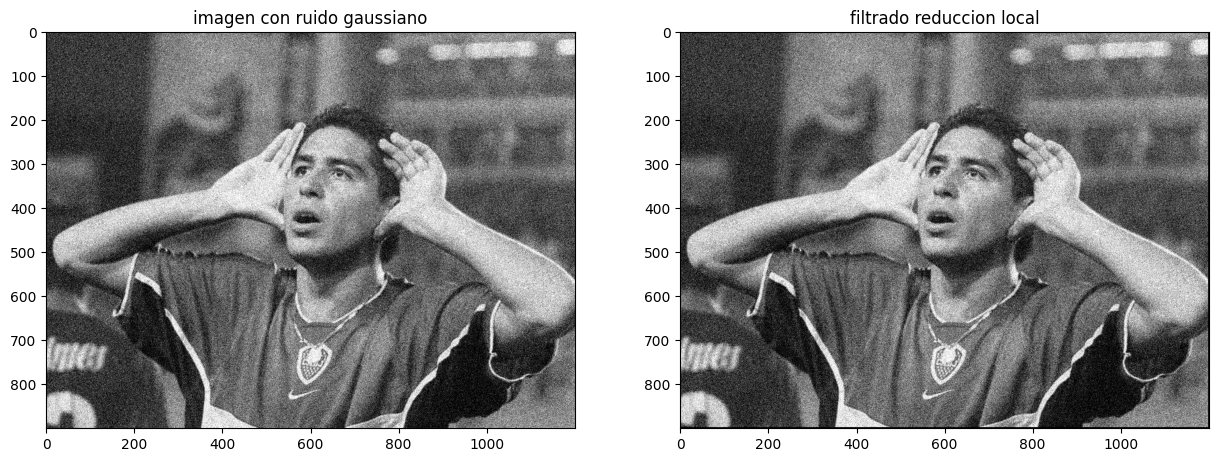

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,15))
ax[0].imshow(imagen_4_gauss,cmap='gray')
ax[0].set_title('imagen con ruido gaussiano')
ax[1].imshow(imagen_filtrada_reduc_local,cmap='gray')
ax[1].set_title('filtrado reduccion local')
plt.show()

In [ ]:
# 4.3 Aplique a la imagen degradada el filtro de la media geometrica y compare visualmente las imagenes de salida de ambos metodos.
kernel_size = 3
imagen_filtrada_geometrica = geometric_mean_filter(imagen_4_gauss, kernel_size)

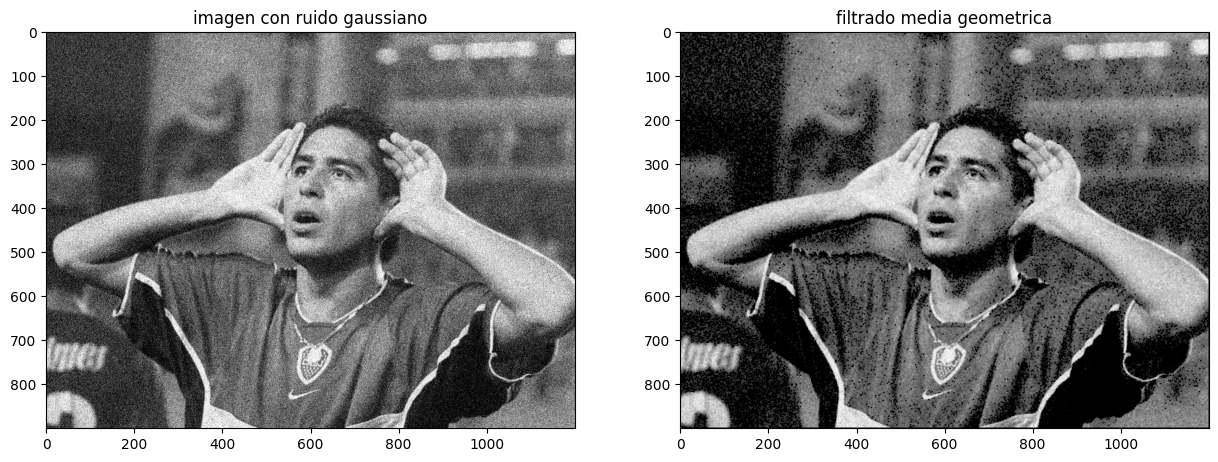

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,15))
ax[0].imshow(imagen_4_gauss,cmap='gray')
ax[0].set_title('imagen con ruido gaussiano')
ax[1].imshow(imagen_filtrada_geometrica,cmap='gray')
ax[1].set_title('filtrado media geometrica')
plt.show()

In [ ]:
def ej4(varianza,media,imagen):
  kernel_size = 5
  ruido_gaussiano2 = generate_gaussian_noise(media_ruido, varianza, imagen.shape)
  imagen_gauss = aplicar_ruido(imagen,ruido_gaussiano2)
  imagen_filtrada_reduc_local = filtro_adaptativo_reduccion_local(imagen_gauss,kernel_size,varianza)
  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,15))
  ax[0].imshow(imagen_gauss,cmap='gray')
  ax[0].set_title('imagen con ruido gaussiano')
  ax[1].imshow(imagen_filtrada_reduc_local,cmap='gray')
  ax[1].set_title('filtrado reduccion local')
  plt.show()

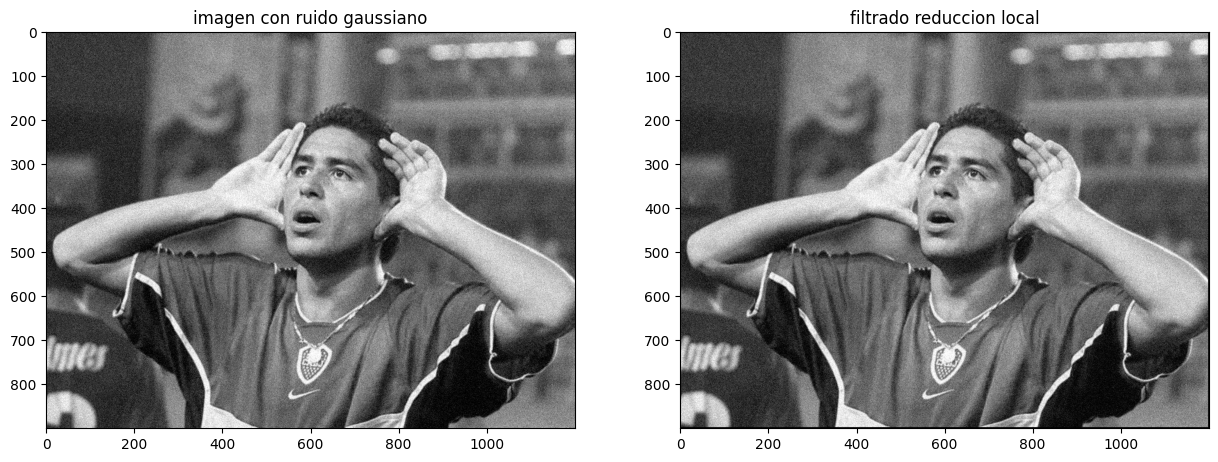

In [ ]:
varianza2 = 20
ej4(varianza=varianza2,media=0,imagen=imagen_4)


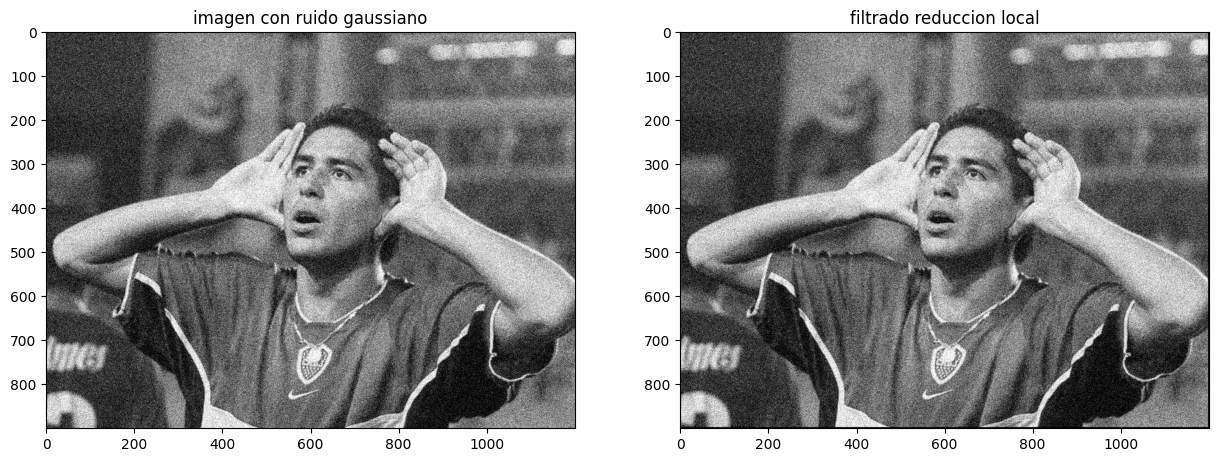

In [ ]:
varianza2 = 40
ej4(varianza=varianza2,media=0,imagen=imagen_4)

In [ ]:
# ================= EJERCICIO 5 ====================

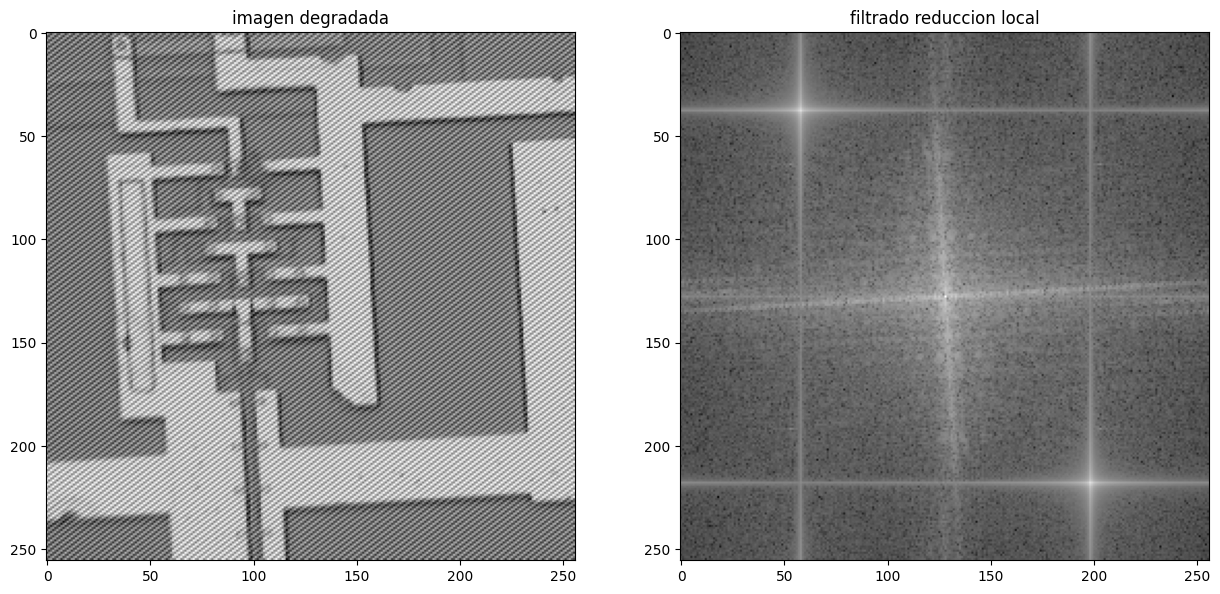

In [ ]:
# Ejercicio 5.1
# La imagen ‘img degradada.tif’ esta degradada por una interferencia sinusoidal. Muestre la imagen y su espectro de Fourier,
# y analice la informacion del ruido.
imagen_5 = cv2.imread('img_degradada.tif',cv2.IMREAD_GRAYSCALE)
height,width = imagen_5.shape
fft5 = np.log1p(np.abs(fftshift(fft2(imagen_5))))
picos_ruido,fft5_sinpicos = localizar_picos(imagen_5,cantidad_puntos=3,radio=15)
print('picos de la imagen con ruido: ')
#print(picos_ruido)
fft5_copy = fft5.copy()
# cv2.circle(fft5_copy, (picos_ruido[0,1], picos_ruido[0,0]), 2,  0, thickness=-1)
# cv2.circle(fft5_copy, (picos_ruido[1][1], picos_ruido[1][0]), 2, 0, thickness=-1)
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
ax[0].imshow(imagen_5,cmap='gray');ax[0].set_title('imagen degradada')
ax[1].imshow(fft5,cmap='gray');ax[1].set_title('filtrado reduccion local')
ax[2].imshow(fft5_sinpicos,cmap='gray');ax[2].set_title('ff5 sin picos')
plt.show()

In [ ]:
# Ejercicio 5.2
#  Localice los picos fundamentales del ruido. (semi-automatico con clicks en la imagen o automatico localizando
# las magnitudes de los picos del ruido).
def localizar_picos(image,cantidad_puntos,radio):
  picos = np.zeros((cantidad_puntos,2))
  #Quitamos el pico del centro
  height,width = image.shape
  centre_y, centre_x = height // 2, width // 2
  y, x = np.ogrid[:height, :width]
  mascara_circular = (x - centre_x) ** 2 + (y - centre_y) ** 2 <= radio ** 2
  fft = np.fft.fft2(image)
  fft_shifted = np.fft.fftshift(fft)
  fft_log = np.log1p(np.abs(fft_shifted))
  fft_log[mascara_circular] = 0

  #buscamos los maximos locales
  for i in range(cantidad_puntos):
    indice_maximo = np.argmax(fft_log[0:centre_x,:])
    indice_fila, indice_columna = np.unravel_index(indice_maximo, fft_log.shape)
    picos[i,:] = [indice_fila,indice_columna]
    mascara_circular = ( x- indice_columna) ** 2 + (y - indice_fila) ** 2 <= radio ** 2
    fft_log[mascara_circular] = 0
    mascara_circular = (y - int(height-indice_fila)) ** 2 + (x -int(width-indice_columna)) ** 2 <= radio ** 2
    fft_log[mascara_circular] = 0
  return picos,fft_log

In [ ]:
def ideal_bandreject_filter(image_shape,radio,thickness):
  height,width = image_shape
  mask = np.ones((height,width), dtype=np.uint8)
  cv2.circle(mask,(width//2, height//2), radio, 0, thickness)
  return mask

0 0


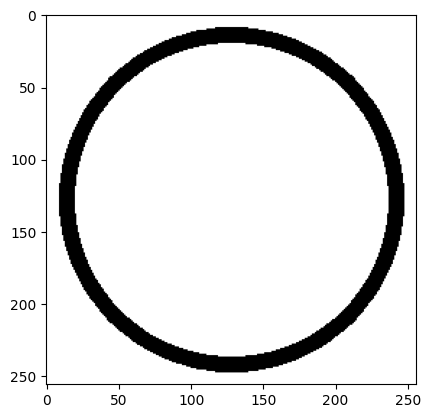

In [ ]:
# Ejercicio 5.3
# 3. Utilice estos parametros para implementar los siguientes filtros:
imagen_5 = cv2.imread('img_degradada.tif',cv2.IMREAD_GRAYSCALE)
height,width  = imagen_5.shape
picos,_ = localizar_picos(imagen_5,cantidad_puntos=1,radio=5)
pico1 = picos[0] #pico1 -> [y,x]
radio = int(((height//2 - pico1[0])**2 + (width//2 - pico1[1])**2)**(1/2))
thickness=10
filtro_ideal = ideal_bandreject_filter(imagen_5.shape,radio,thickness)
print(filtro_ideal[38,58],filtro_ideal[218, 198])
plt.imshow(filtro_ideal,cmap='gray')


In [ ]:
def butterworth_lowpass_filter(image_shape,cutoff, n):
  height,width  = image_shape
  centre_y, centre_x = height // 2, width // 2
  mask = np.zeros((height, width), dtype=np.float32)
  for i in range(height):
    for j in range(width):
      mask[i, j] = 1 / (1 + (np.sqrt((i - centre_y) ** 2 + (j - centre_x) ** 2) / cutoff) ** (2 * n))
  return mask
#cutoff_1 -> largest cutoff frequency that determines the upper radious
#cutoff_2 -> smallest cutoff frequency that determines the lower radious
def butterworth_bandreject_filter(image_shape,cutoff_1,cutoff_2 ,n):
  highpass = 1 - butterworth_lowpass_filter(image_shape,cutoff_1, n)
  lowpass = butterworth_lowpass_filter(image_shape,cutoff_2, n)
  mask = highpass + lowpass
  return mask

0.03828305 0.03828305


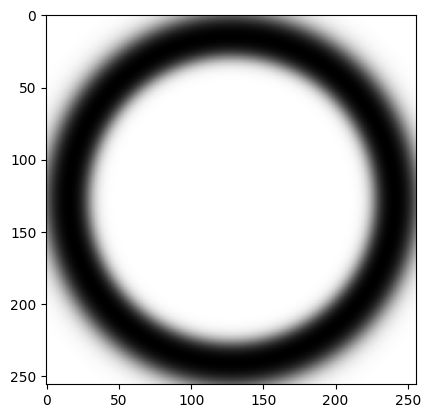

In [ ]:
imagen_5 = cv2.imread('img_degradada.tif',cv2.IMREAD_GRAYSCALE)
height,width  = imagen_5.shape
picos,_ = localizar_picos(imagen_5,cantidad_puntos=1,radio=5)
pico1 = picos[0]
radio = int(((height//2 - pico1[0])**2 + (width//2 - pico1[1])**2)**(1/2))
cutoff=15
n = 15
butterworh_bandreject = butterworth_bandreject_filter(imagen_5.shape,radio+cutoff,radio-cutoff,n)
print(butterworh_bandreject[38,58],butterworh_bandreject[218,198])
plt.imshow(butterworh_bandreject,cmap='gray')

In [ ]:
#picos -> [[y,x],..]
def ideal_notch_filter(image_shape, picos, thickness):
 height,width  = image_shape
 notch_filter = np.ones((height, width), dtype=np.float32)

 for i in range(len(picos)):
    pico_y, pico_x = picos[i,:]
    for u in range(height):
        for v in range(width):
            distance = np.sqrt((u - pico_y)**2 + (v - pico_x)**2)
            if distance < thickness:
                notch_filter[u, v] = 0
                notch_filter[height-u-1, width-v-1] = 0
 return notch_filter

[38, 58]
0.0 0.0


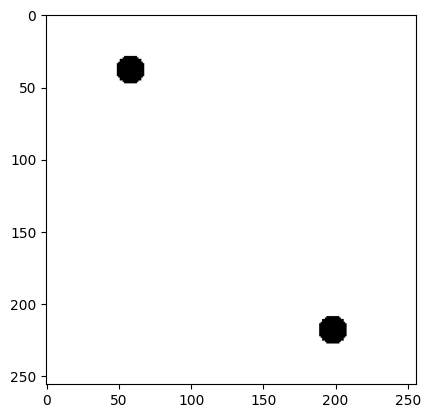

In [ ]:
imagen_5 = cv2.imread('img_degradada.tif',cv2.IMREAD_GRAYSCALE)
thickness=10
# Crear el filtro notch
picos, _ =localizar_picos(imagen_5,cantidad_puntos=3,radio=20)
notch_filter = ideal_notch_filter(imagen_5.shape, picos, thickness)

print(notch_filter[38,58],notch_filter[218, 198])
plt.imshow(notch_filter,cmap='gray')

In [ ]:
def butterworth_notch_filter(image_shape, pìcos, cutoff,n):
 height,width  = image_shape
 notch_filter = np.ones((height, width), dtype=np.float32)
 for i in range(len(picos)):
    pico_y, pico_x = pìcos[i,:]
    for u in range(height):
        for v in range(width):
            b = 1 / (1 + (np.sqrt((u - pico_y) ** 2 + (v - pico_x) ** 2) / cutoff) ** (2 * n))
            notch_filter[u, v] -=  b
            notch_filter[height-u-1, width-v-1] -= b
 return notch_filter

In [ ]:
imagen_5 = cv2.imread('img_degradada.tif',cv2.IMREAD_GRAYSCALE)
height,width  = imagen_5.shape
picos, _ =localizar_picos(imagen_5,cantidad_puntos=3,radio=20)
cutoff=10
n = 15
butterworth_notch = butterworth_notch_filter(imagen_5.shape,picos,cutoff,n)
print(butterworth_notch[38,58],butterworth_notch[218,198])
plt.imshow(butterworth_notch,cmap='gray')

In [ ]:
def gaussian_lowpass_filter(image_shape, sigma):
  height,width  = image_shape
  centre_y, centre_x = height // 2, width // 2
  #Create mask
  mask = np.zeros((height, width), dtype=np.float32)
  for u in range(height):
      for v in range(width):
          distance = (u - centre_y) ** 2 + (v - centre_x) ** 2
          mask[u, v] = np.exp(-distance / (2 * sigma ** 2))
  return mask

In [ ]:
# Ejercicio 5.4
# Aplique los filtros y compare cualitativamente las imagenes filtradas respecto de la imagen original ‘img.tif’
# y cuantitativamente mediante el calculo del ECM.
# Ajuste los parametros de los filtros para obtener mejores resultados.
# ¿Se anima a comparar los resultados con los de un pasa-bajos frecuencial implementado en la guıa previa?
img = cv2.imread('img.tif',cv2.IMREAD_GRAYSCALE)
img_degraded = cv2.imread('img_degradada.tif',cv2.IMREAD_GRAYSCALE)
picos,_ = localizar_picos(img_degraded,cantidad_puntos=4,radio=20)
height,width  = img_degraded.shape
pico1 = picos[0] #pico1 -> [y,x]
radio = int(((height//2 - pico1[0])**2 + (width//2 - pico1[1])**2)**(1/2))
thickness=15
ideal_bandreject = ideal_bandreject_filter(imagen_5.shape,radio,thickness)
ideal_notch = ideal_notch_filter(imagen_5.shape, picos, thickness)

cutoff=15; n = 5
butterworh_bandreject = butterworth_bandreject_filter(imagen_5.shape,radio+cutoff,radio-cutoff,n)

cutoff=15; n=5
butterworth_notch = butterworth_notch_filter(imagen_5.shape,picos,cutoff,n)
sigma = 50
gaussain_lowpass = gaussian_lowpass_filter(imagen_5.shape,sigma)

fft = np.fft.fft2(img_degraded)
fft_shift = fftshift(fft)

fft_filtered_1 = fft_shift * ideal_bandreject
fft_filtered_2 = fft_shift * ideal_notch
fft_filtered_3 = fft_shift * butterworh_bandreject
fft_filtered_4 = fft_shift * butterworth_notch
fft_filtered_5 = fft_shift * gaussain_lowpass

image_filtered_1 = np.fft.ifft2(np.fft.ifftshift(fft_filtered_1))
image_filtered_2 = np.fft.ifft2(np.fft.ifftshift(fft_filtered_2))
image_filtered_3 = np.fft.ifft2(np.fft.ifftshift(fft_filtered_3))
image_filtered_4 = np.fft.ifft2(np.fft.ifftshift(fft_filtered_4))
image_filtered_5 = np.fft.ifft2(np.fft.ifftshift(fft_filtered_5))

image_filtered_1 = np.abs(image_filtered_1).astype(np.uint8)
image_filtered_2 = np.abs(image_filtered_2).astype(np.uint8)
image_filtered_3 = np.abs(image_filtered_3).astype(np.uint8)
image_filtered_4 = np.abs(image_filtered_4).astype(np.uint8)
image_filtered_5 = np.abs(image_filtered_5).astype(np.uint8)

fig,ax = plt.subplots(nrows=3,ncols=4,figsize=(16,12))

ax[0,0].imshow(image_filtered_1,cmap='gray');ax[0,0].set_title('img ideal_bandreject')
ax[0,1].imshow(image_filtered_2,cmap='gray');ax[0,1].set_title('img ideal_notch')
ax[0,2].imshow(image_filtered_3,cmap='gray');ax[0,2].set_title('img butterworh_bandreject')
ax[0,3].imshow(image_filtered_4,cmap='gray');ax[0,3].set_title('img butterworth_notch')

ax[1,0].imshow(ideal_bandreject,cmap='gray');ax[1,0].set_title('ideal_bandreject')
ax[1,1].imshow(ideal_notch,cmap='gray');ax[1,1].set_title('ideal_notch')
ax[1,2].imshow(butterworh_bandreject,cmap='gray');ax[1,2].set_title('butterworh_bandreject')
ax[1,3].imshow(butterworth_notch,cmap='gray');ax[1,3].set_title('butterworth_notch')

ax[2,0].imshow(img,cmap='gray');ax[2,0].set_title('img original')
ax[2,1].imshow(img_degraded,cmap='gray');ax[2,1].set_title('img con ruido')
ax[2,2].imshow(image_filtered_5,cmap='gray');ax[2,2].set_title('img gaussain_lowpass')
ax[2,3].imshow(gaussain_lowpass,cmap='gray');ax[2,3].set_title('gaussain_lowpass')

In [ ]:
#ECM
print('img_degraded: ',calcular_ecm(img, img_degraded))
print('ideal_bandreject: ',calcular_ecm(img, image_filtered_1))
print('ideal_notch: ',calcular_ecm(img, image_filtered_2))
print('butterworh_bandreject: ',calcular_ecm(img, image_filtered_3))
print('butterworth_notch: ',calcular_ecm(img, image_filtered_4))
print('gaussain_lowpass: ',calcular_ecm(img, image_filtered_5))

In [ ]:
# Ejercicio 5.5
img_degraded = cv2.imread('img_degradada.tif',cv2.IMREAD_GRAYSCALE)
picos,_ = localizar_picos(img_degraded,cantidad_puntos=1,radio=5)
pico1 = picos[0] #pico1 -> [y,x]
cutoff=30; n=5
butterworth_notch = butterworth_notch_filter(img_degraded.shape,picos,cutoff,n)

fft = np.fft.fft2(img_degraded)
fft_shift = fftshift(fft)
fft_filtered = fft_shift * (1-butterworth_notch)

image_filtered = np.fft.ifft2(np.fft.ifftshift(fft_filtered))
image_filtered = np.abs(image_filtered).astype(np.uint8)
plt.imshow(image_filtered,cmap='gray')

In [ ]:
# Ejercicio 5.6
HeadCT_degradada = cv2.imread('HeadCT_degradada.tif',cv2.IMREAD_GRAYSCALE)
noisy_moon = cv2.imread('noisy_moon.jpg',cv2.IMREAD_GRAYSCALE)
cantidad_puntos= 2 ; radio = 5
picos, _ = localizar_picos(HeadCT_degradada,cantidad_puntos,radio)
pico1 = picos[0] #pico1 -> [y,x]
thickness=50
radio = int(((height//2 - pico1[0])**2 + (width//2 - pico1[1])**2)**(1/2))
cutoff=50
ideal_bandreject = butterworth_bandreject_filter(HeadCT_degradada.shape,radio+cutoff,radio-cutoff,n)

fft = np.fft.fft2(HeadCT_degradada)
fft_shift_1 = fftshift(fft)

fft_filtered = fft_shift_1 * ideal_bandreject
image_filtered = np.fft.ifft2(np.fft.ifftshift(fft_filtered))
image_filtered_1 = np.abs(image_filtered).astype(np.uint8)

picos, _ = localizar_picos(noisy_moon,cantidad_puntos,radio)
pico1 = picos[0] #pico1 -> [y,x]
cutoff=30; n=5
butterworth_notch = butterworth_notch_filter(noisy_moon.shape, picos, cutoff,n)

fft = np.fft.fft2(noisy_moon)
fft_shift_2 = fftshift(fft)

fft_filtered = fft_shift_2 * butterworth_notch
image_filtered = np.fft.ifft2(np.fft.ifftshift(fft_filtered))
image_filtered_2 = np.abs(image_filtered).astype(np.uint8)

fig,ax = plt.subplots(nrows=2,ncols=4,figsize=(16,12))
ax[0,0].imshow(HeadCT_degradada,cmap='gray');ax[0,0].set_title('img ideal_bandreject')
ax[0,1].imshow(np.log1p(np.abs(fft_shift_1)),cmap='gray');ax[0,1].set_title('img fft')
ax[0,2].imshow(ideal_bandreject,cmap='gray');ax[0,2].set_title('ideal_notch')
ax[0,3].imshow(image_filtered_1,cmap='gray');ax[0,3].set_title('img ideal_notch')

ax[1,0].imshow(noisy_moon,cmap='gray');ax[1,0].set_title('img ideal_bandreject')
ax[1,1].imshow(np.log1p(np.abs(fft_shift_2)),cmap='gray');ax[1,1].set_title('img fft')
ax[1,2].imshow(ideal_notch,cmap='gray');ax[1,2].set_title('ideal_notch')
ax[1,3].imshow(image_filtered_2,cmap='gray');ax[1,3].set_title('img ideal_notch')
